### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
### Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

### Import Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering

### Import Data

In [2]:
airlines = pd.read_csv("EastWestAirlines.csv")
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airlines.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


### Data Understanding

In [5]:
airlines.shape

(3999, 12)

In [6]:
airlines.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
airlines.nunique()

ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

In [10]:
airlines.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

### Dropping unwanted feature and renaming a feature 

In [11]:
airlines.drop(['ID#'],axis = 1, inplace = True)

In [12]:
airlines.rename(columns={'Award?':'Award'}, inplace = True)

In [13]:
airlines.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
5,16420,0,1,1,1,0,0,0,0,6942,0
6,84914,0,3,1,1,27482,25,0,0,6994,0
7,20856,0,1,1,1,5250,4,250,1,6938,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1


### Data Visualization

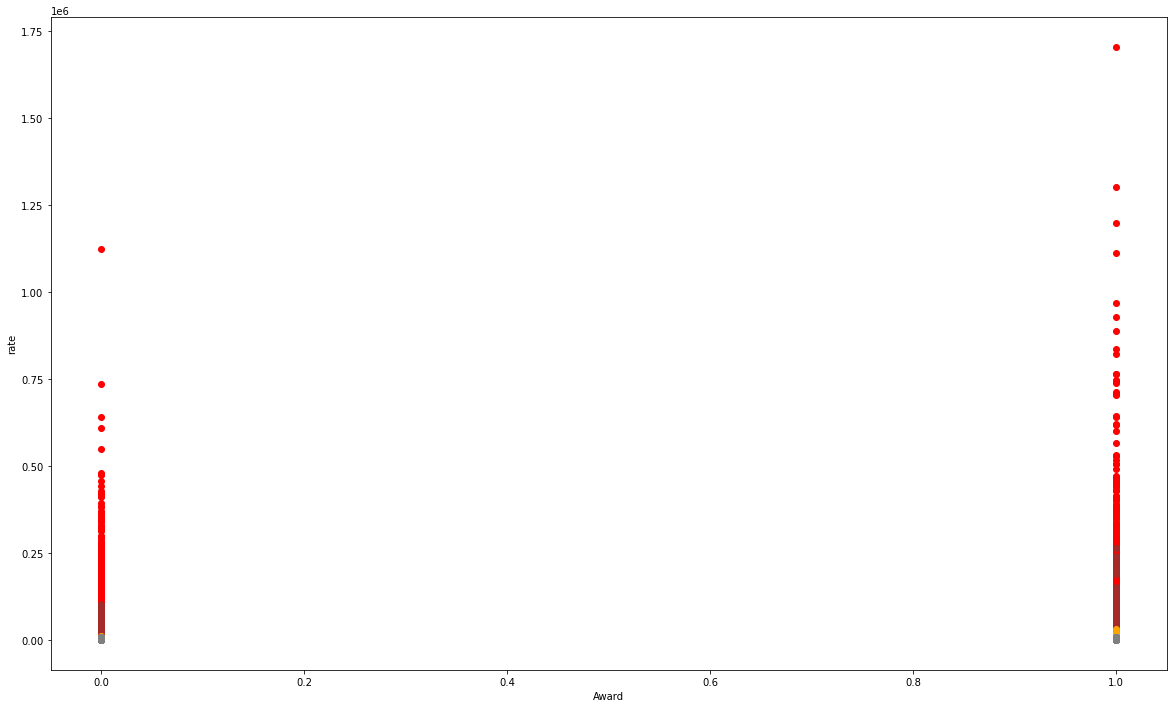

In [14]:
plt.figure(figsize=(20,12))

plt.scatter(airlines.Award, airlines.Balance, color='red')    
plt.scatter(airlines.Award, airlines.Qual_miles, color='green')
plt.scatter(airlines.Award, airlines.cc1_miles, color='blue')
plt.scatter(airlines.Award, airlines.cc2_miles, color='yellow')
plt.scatter(airlines.Award, airlines.cc3_miles, color='cyan')
plt.scatter(airlines.Award, airlines.Bonus_miles, color='brown')
plt.scatter(airlines.Award, airlines.Bonus_trans, color='black')
plt.scatter(airlines.Award, airlines.Flight_miles_12mo, color='orange')
plt.scatter(airlines.Award, airlines.Flight_trans_12, color='purple')
plt.scatter(airlines.Award, airlines.Days_since_enroll, color='grey')

      
    

plt.xlabel('Award')
plt.ylabel('rate')
plt.show()

### Data Preprocessing

In [15]:
scaler = StandardScaler()
scaled_airlines = scaler.fit_transform(airlines.iloc[:,0:])
print(scaled_airlines)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


### K Means Clustering :

### Finding out the optimal number of clusters

#### The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion

### Elbow Method :


In [16]:
wcssd = [] # wcss = within cluster sum of squared distance
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state=12121)
    kmeans.fit(scaled_airlines)
    wcssd.append(kmeans.inertia_)
wcssd

[43988.999999999985,
 35409.5166298613,
 30899.708801467666,
 27153.94818714846,
 23700.398440609613,
 21470.860946462697,
 19166.341316764832,
 17316.753604356494,
 15965.662311075117,
 14727.248025854504,
 13706.168651511853,
 12946.449623633971,
 12494.137122783643,
 11913.011417354217]

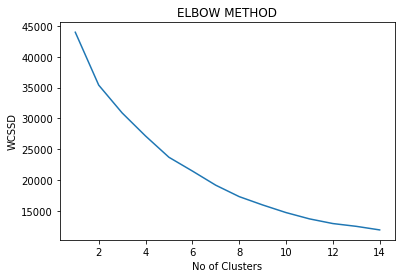

In [17]:
plt.plot(range(1,15),wcssd)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSSD')
plt.show()

### The plot levels off at 2 and let's use it to determine the clusters as K = 2
### Analysing the data with number of clusters = 2

In [18]:
clusters_new = KMeans(n_clusters=2, random_state=12121)
clusters_new.fit(scaled_airlines)

KMeans(n_clusters=2, random_state=12121)

In [19]:
clusters_new.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
#Assign clusters to the data set
airlines['kmeans_clusters'] = clusters_new.labels_

In [21]:
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [22]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.28377998, -0.07090394, -0.54434531,  0.01481909, -0.06086653,
        -0.48570121, -0.44172756, -0.17513227, -0.19493257, -0.19221198,
        -0.33831125],
       [ 0.58716103,  0.1467053 ,  1.1262893 , -0.03066175,  0.1259372 ,
         1.00495046,  0.91396585,  0.36236117,  0.40332941,  0.3977003 ,
         0.69999012]])

In [23]:
airlines.groupby('kmeans_clusters').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
kmeans_clusters,,,,,,,,,,,
0,45041.650352,89.232481,1.310716,1.016685,1.000371,5421.404894,7.363737,215.211346,0.635521,3720.834631,0.206897
1,132760.658986,257.798771,3.610599,1.009985,1.036866,41429.117512,20.380952,967.233487,2.902458,4942.417819,0.708909


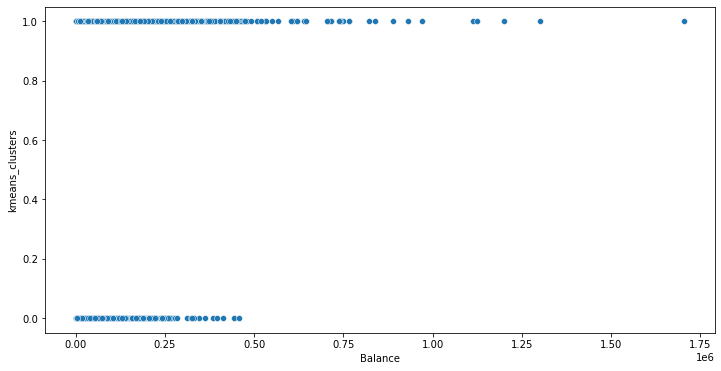

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=airlines['Balance'], y = airlines['kmeans_clusters'])
plt.show()

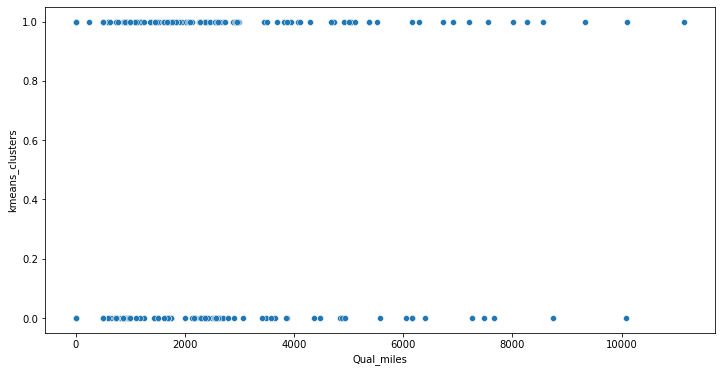

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=airlines['Qual_miles'], y = airlines['kmeans_clusters'])
plt.show()

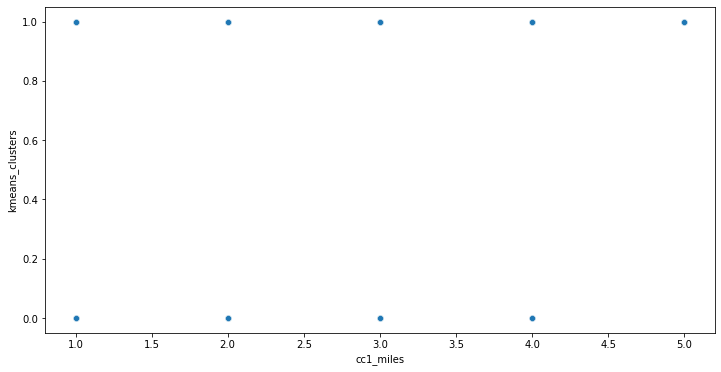

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=airlines['cc1_miles'], y = airlines['kmeans_clusters'])
plt.show()

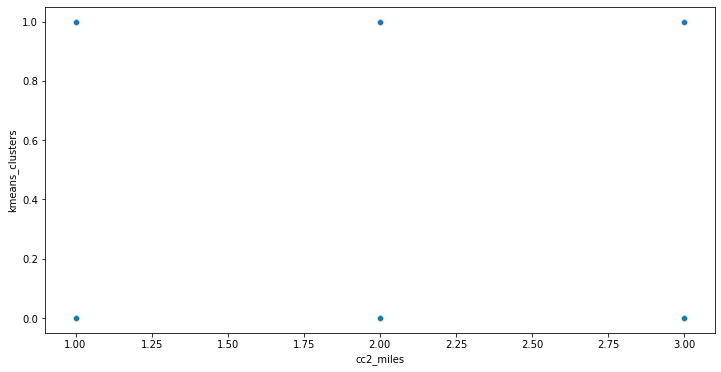

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=airlines['cc2_miles'], y = airlines['kmeans_clusters'])
plt.show()

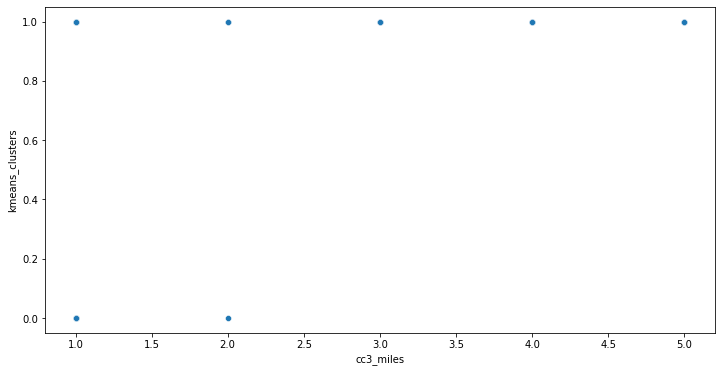

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=airlines['cc3_miles'], y = airlines['kmeans_clusters'])
plt.show()

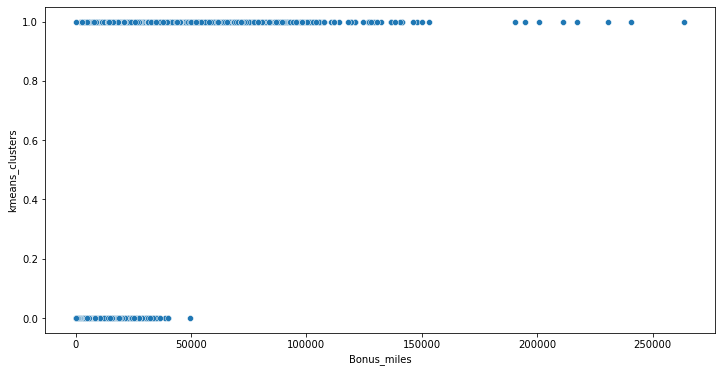

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=airlines['Bonus_miles'], y = airlines['kmeans_clusters'])
plt.show()

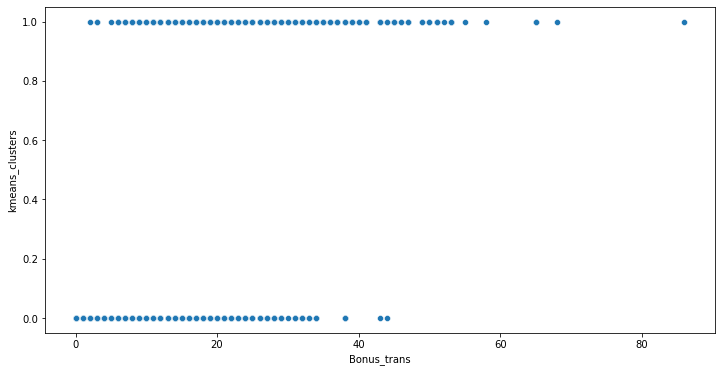

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=airlines['Bonus_trans'], y = airlines['kmeans_clusters'])
plt.show()

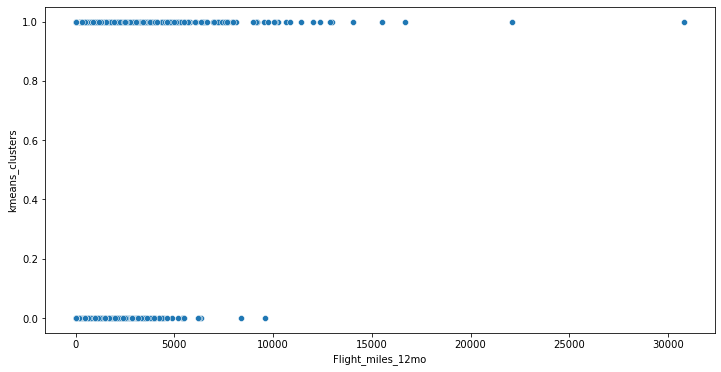

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=airlines['Flight_miles_12mo'], y =airlines['kmeans_clusters'])
plt.show()

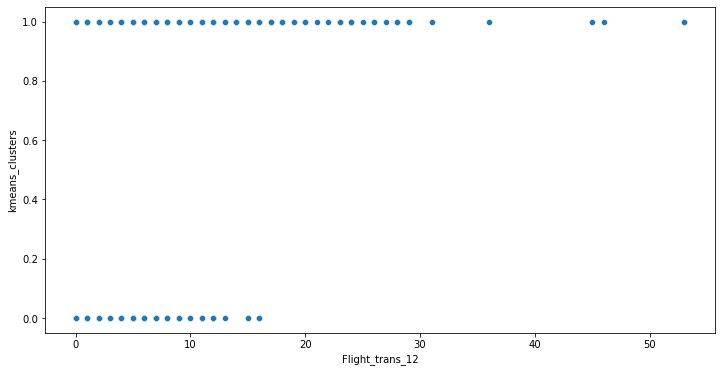

In [32]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=airlines['Flight_trans_12'], y = airlines['kmeans_clusters'])
plt.show()

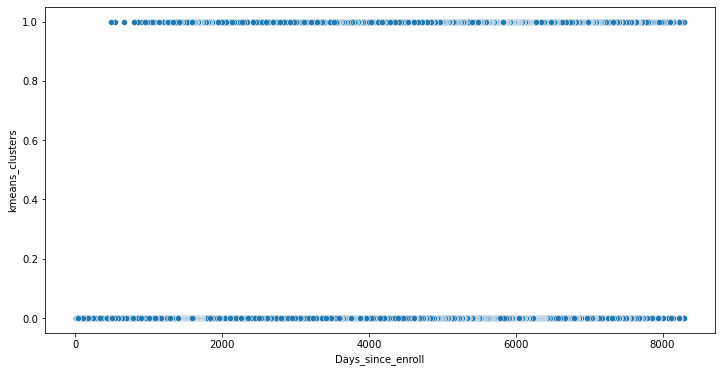

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=airlines['Days_since_enroll'], y =airlines['kmeans_clusters'])
plt.show()

In [34]:
clusters = airlines.sort_values("kmeans_clusters", ascending=True)
airlines_kmeans_clusters = pd.DataFrame(clusters)

In [35]:
airlines_kmeans_clusters

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
2578,29346,0,1,1,1,150,1,150,1,2773,0,0
2580,42366,0,2,1,1,6293,9,0,0,2770,0,0
2581,151336,651,1,1,1,11400,6,1000,4,2742,0,0
2582,48363,0,1,1,1,790,3,0,0,2766,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1076,35342,0,5,1,1,70454,12,0,0,5534,1,1
2693,102942,0,5,1,1,56780,18,0,0,2405,0,1
2690,76938,0,3,1,1,23503,13,0,0,2422,1,1
1244,166465,0,4,1,4,98717,30,0,0,5531,0,1


In [36]:
airlines[airlines['kmeans_clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [37]:
airlines[airlines['kmeans_clusters']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
6,84914,0,3,1,1,27482,25,0,0,6994,0,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,96522,0,5,1,1,61105,19,0,0,6924,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3966,91605,0,4,1,1,37840,18,0,0,1444,0,1
3973,72297,0,3,1,1,16241,16,0,0,1587,1,1
3974,58387,0,3,1,1,14581,39,0,0,1435,0,1
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,1


------
### DBSCAN

In [38]:
dbscan = DBSCAN(eps=2,min_samples=4)
dbscan.fit(scaled_airlines)

DBSCAN(eps=2, min_samples=4)

In [39]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [40]:
airlines['dbscan_clusters']=dbscan.labels_
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [41]:
airlines.groupby('dbscan_clusters').agg(['mean']).reset_index()

,dbscan_clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,265963.377246,1706.179641,2.952096,1.101796,1.293413,55517.940120,26.772455,3675.167665,10.023952,4963.287425,0.784431,0.934132
1,0,57945.834896,61.131675,1.696698,1.000000,1.000000,9806.308602,8.910722,191.042397,0.563392,3816.267020,0.000000,0.140644
2,1,78674.577961,104.754873,2.650675,1.000000,1.000000,26028.550975,14.458021,505.716642,1.589955,4574.325337,1.000000,0.590705
3,2,51096.000000,0.000000,1.000000,3.000000,1.000000,15561.666667,14.333333,44.444444,0.222222,3603.444444,0.000000,0.000000
4,3,39218.500000,0.000000,1.000000,2.000000,1.000000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000,0.000000
5,4,106247.500000,273.500000,1.000000,1.000000,1.000000,8641.000000,19.250000,6991.000000,18.000000,5112.000000,0.000000,1.000000
6,5,40618.000000,0.000000,1.000000,2.000000,1.000000,8444.142857,14.285714,250.000000,0.714286,4612.285714,1.000000,0.000000
7,6,73323.400000,117.800000,1.000000,1.000000,1.000000,12311.200000,30.000000,3734.600000,24.800000,4324.800000,1.000000,1.000000
8,7,164878.000000,0.000000,1.000000,1.000000,1.000000,17867.500000,27.000000,7655.000000,25.000000,3707.250000,1.000000,1.000000


### Plot Clusters

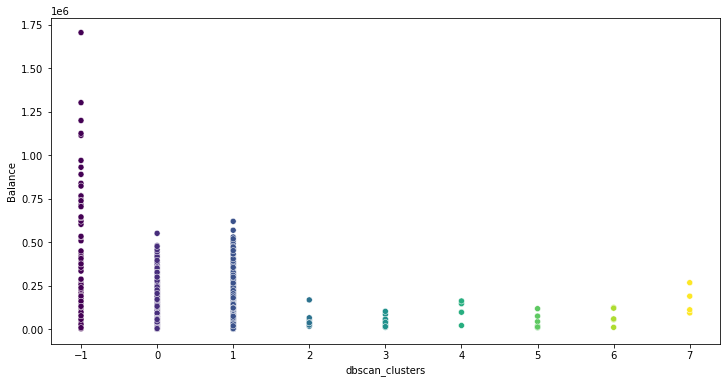

In [42]:
plt.figure(figsize=(12,6))
sns.scatterplot( airlines['dbscan_clusters'],airlines['Balance'],c=dbscan.labels_)
plt.show()

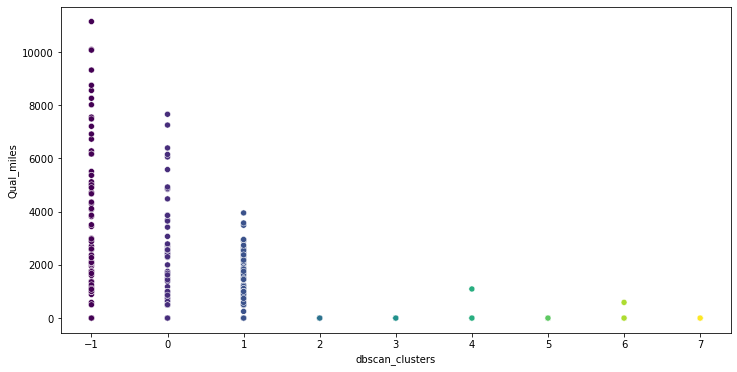

In [43]:
plt.figure(figsize=(12,6))
sns.scatterplot( airlines['dbscan_clusters'],airlines['Qual_miles'],c=dbscan.labels_)
plt.show()

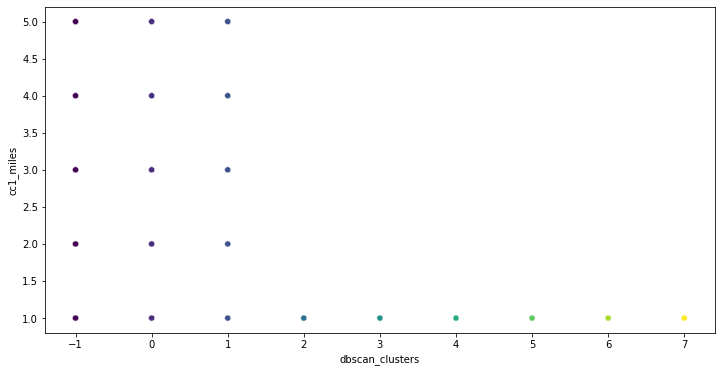

In [44]:
plt.figure(figsize=(12,6))
sns.scatterplot( airlines['dbscan_clusters'],airlines['cc1_miles'],c=dbscan.labels_)
plt.show()

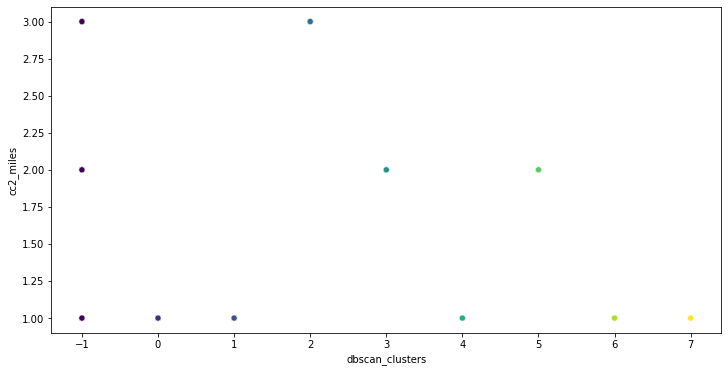

In [45]:
plt.figure(figsize=(12,6))
sns.scatterplot( airlines['dbscan_clusters'],airlines['cc2_miles'],c=dbscan.labels_)
plt.show()

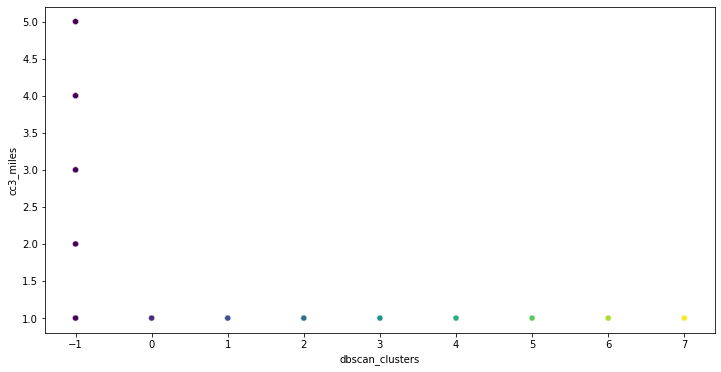

In [46]:
plt.figure(figsize=(12,6))
sns.scatterplot( airlines['dbscan_clusters'],airlines['cc3_miles'],c=dbscan.labels_)
plt.show()

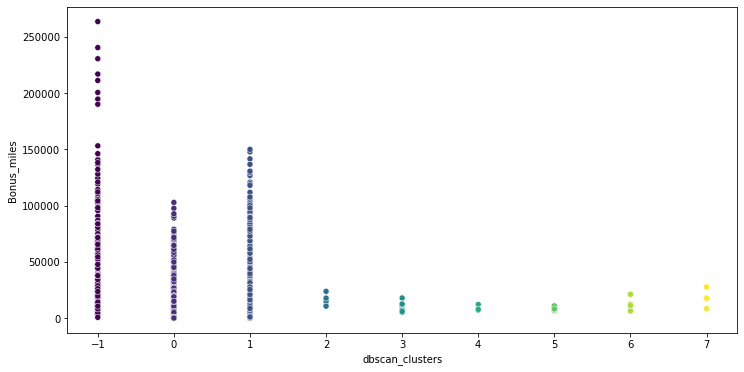

In [47]:
plt.figure(figsize=(12,6))
sns.scatterplot( airlines['dbscan_clusters'],airlines['Bonus_miles'],c=dbscan.labels_)
plt.show()

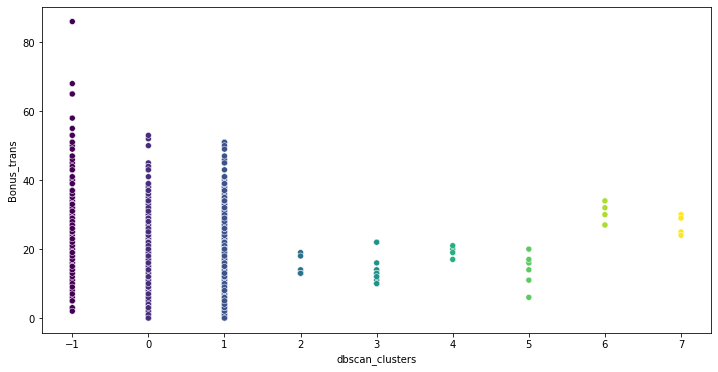

In [48]:
plt.figure(figsize=(12,6))
sns.scatterplot( airlines['dbscan_clusters'],airlines['Bonus_trans'],c=dbscan.labels_)
plt.show()

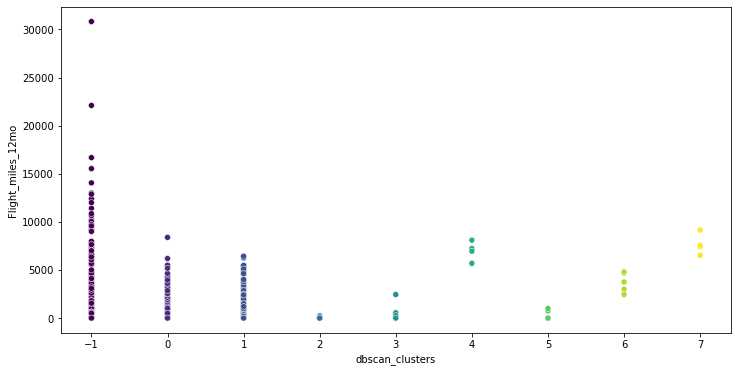

In [49]:
plt.figure(figsize=(12,6))
sns.scatterplot( airlines['dbscan_clusters'],airlines['Flight_miles_12mo'],c=dbscan.labels_)
plt.show()

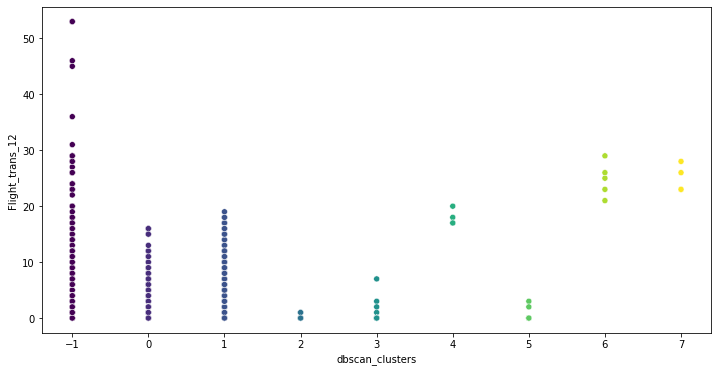

In [50]:
plt.figure(figsize=(12,6))
sns.scatterplot( airlines['dbscan_clusters'],airlines['Flight_trans_12'],c=dbscan.labels_)
plt.show()

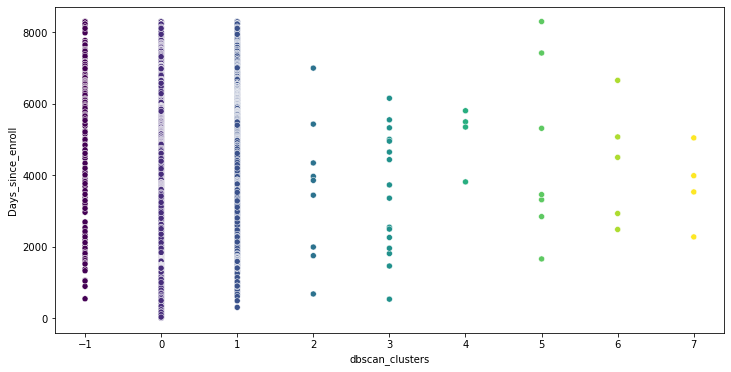

In [51]:
plt.figure(figsize=(12,6))
sns.scatterplot( airlines['dbscan_clusters'],airlines['Days_since_enroll'],c=dbscan.labels_)
plt.show()

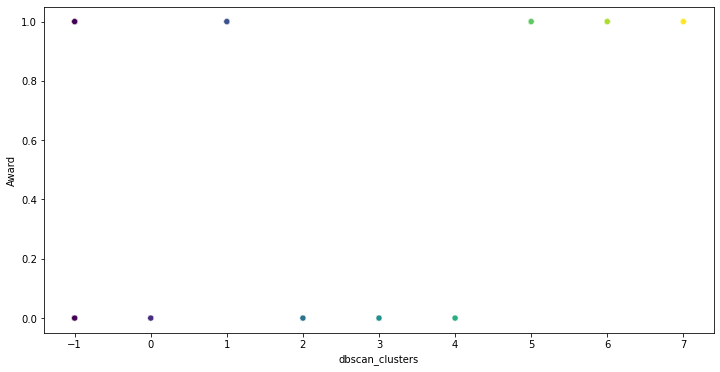

In [52]:
plt.figure(figsize=(12,6))
sns.scatterplot( airlines['dbscan_clusters'],airlines['Award'],c=dbscan.labels_)
plt.show()

In [53]:
dbscan_cl = airlines.sort_values("dbscan_clusters", ascending=True)
airlines_dbscan_clusters = pd.DataFrame(dbscan_cl)

airlines_dbscan_clusters

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters
1300,737514,0,3,1,4,43993,40,2150,7,5030,0,1,-1
1188,837979,0,1,1,1,18372,15,1450,4,5373,1,1,-1
384,28193,0,5,1,4,103456,32,0,0,6980,1,1,-1
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,1,-1
2489,704113,0,5,1,1,98119,23,0,0,3082,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,123646,0,1,1,1,12450,30,2450,29,5069,1,1,6
3282,110839,0,1,1,1,17550,24,7550,23,2272,1,1,7
1489,266776,0,1,1,1,8370,30,6520,28,5042,1,1,7
2375,92843,0,1,1,1,27650,29,9150,26,3530,1,1,7


In [54]:
airlines[airlines['dbscan_clusters']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters
8,443003,0,3,2,1,1753,43,3850,12,6948,1,1,-1
50,108137,0,1,1,1,6368,5,6368,5,6844,0,0,-1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,1,-1
70,84409,5031,2,1,1,15436,16,1150,4,7766,0,1,-1
87,609477,0,3,1,1,21422,22,1200,8,6820,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,97510,1678,5,1,1,71609,51,7650,26,1665,1,1,-1
3883,126167,0,5,1,1,190160,15,0,0,1612,1,1,-1
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,1,-1
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,1,-1


In [55]:
airlines[airlines['dbscan_clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,39142,0,3,1,1,14981,28,0,0,1408,0,0,0
3992,11181,0,1,1,1,929,12,0,0,1407,0,0,0
3993,3974,0,1,1,1,365,3,0,0,1397,0,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [56]:
airlines[airlines['dbscan_clusters']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
7,20856,0,1,1,1,5250,4,250,1,6938,1,0,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1,1
11,96522,0,5,1,1,61105,19,0,0,6924,1,1,1
15,28495,0,4,1,1,49442,15,0,0,6912,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,11933,0,1,1,1,249,3,79,1,1412,1,0,1
3989,2622,0,1,1,1,1625,6,0,0,1404,1,0,1
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1


In [57]:
airlines[airlines['dbscan_clusters']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters
381,167670,0,1,3,1,15907,13,0,0,6994,0,0,2
1270,16103,0,1,3,1,10819,13,0,0,5427,0,0,2
1791,32510,0,1,3,1,14568,13,0,0,4341,0,0,2
1918,52139,0,1,3,1,16314,14,250,1,3965,0,0,2
2278,30171,0,1,3,1,15370,13,0,0,3853,0,0,2
3203,64924,0,1,3,1,14971,13,0,0,1989,0,0,2
3367,23197,0,1,3,1,10587,13,150,1,1747,0,0,2
3611,37300,0,1,3,1,23760,19,0,0,676,0,0,2
3779,35850,0,1,3,1,17759,18,0,0,3439,0,0,2


In [58]:
airlines[airlines['dbscan_clusters']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters
794,55610,0,1,2,1,5095,13,0,0,6151,0,0,3
1149,84856,0,1,2,1,6894,13,0,0,5547,0,0,3
1389,49145,0,1,2,1,12755,22,2450,7,5323,0,0,3
1527,23965,0,1,2,1,7308,16,550,3,5003,0,0,3
1541,36887,0,1,2,1,9048,11,0,0,4951,0,0,3
1976,11961,0,1,2,1,11961,10,0,0,4646,0,0,3
2006,101901,0,1,2,1,17898,22,100,1,4433,0,0,3
2317,10458,0,1,2,1,10458,12,0,0,3726,0,0,3
2421,41062,0,1,2,1,8275,11,0,0,3356,0,0,3
2741,42970,0,1,2,1,7889,14,0,0,2256,0,0,3


In [59]:
airlines[airlines['dbscan_clusters']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters
976,20498,0,1,1,1,7826,20,7226,18,5491,0,1,4
1014,96827,1094,1,1,1,12100,19,8100,17,5801,0,1,4
1236,146086,0,1,1,1,6950,17,6950,17,5345,0,1,4
2179,161579,0,1,1,1,7688,21,5688,20,3811,0,1,4


In [60]:
airlines[airlines['dbscan_clusters']==5]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters
226,117329,0,1,2,1,6448,11,0,0,7416,1,0,5
392,11189,0,1,2,1,9044,20,0,0,8296,1,0,5
1383,18154,0,1,2,1,7748,16,0,0,5310,1,0,5
2557,42966,0,1,2,1,7734,6,0,0,2840,1,0,5
2967,8210,0,1,2,1,9122,16,0,0,3312,1,0,5
3762,74531,0,1,2,1,10914,17,750,3,3456,1,0,5
3851,11947,0,1,2,1,8099,14,1000,2,1656,1,0,5


In [61]:
airlines[airlines['dbscan_clusters']==6]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters
511,9800,589,1,1,1,10348,34,3000,25,6651,1,1,6
1187,123646,0,1,1,1,12450,30,2450,29,5069,1,1,6
1433,120152,0,1,1,1,6250,27,3750,26,4497,1,1,6
3082,54637,0,1,1,1,21181,27,4673,21,2927,1,1,6
3105,58382,0,1,1,1,11327,32,4800,23,2480,1,1,6


In [62]:
airlines[airlines['dbscan_clusters']==7]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters
1489,266776,0,1,1,1,8370,30,6520,28,5042,1,1,7
1911,189054,0,1,1,1,17900,25,7400,23,3985,1,1,7
2375,92843,0,1,1,1,27650,29,9150,26,3530,1,1,7
3282,110839,0,1,1,1,17550,24,7550,23,2272,1,1,7


------
### Hierarchichal Clustering

### Dendrogram

Wall time: 9.23 s


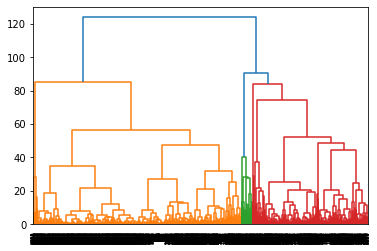

In [63]:
%%time
dgm_ward = sch.dendrogram(sch.linkage(scaled_airlines, method = 'ward' ))

### From the ward linkage method, we see that as the height increases the clusters get grouped together.

### We decided to cut the linkages at height 85 to obtain 4 clusters and then assigned each cluster with its respective observations.


In [64]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(n_clusters=4)

In [65]:
y_hc = hc.fit_predict(scaled_airlines)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [66]:
h_clusters=pd.DataFrame(y_hc,columns=['h_clusters'])
h_clusters

,h_clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,1
3995,1
3996,0
3997,1


In [67]:
airlines['h_clusters'] = h_clusters

In [68]:
hier_c = airlines.sort_values("h_clusters", ascending=True)
hierarchical_clusters = pd.DataFrame(hier_c)

hierarchical_clusters

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters,h_clusters
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,1,1,0
1455,49438,0,4,1,1,33912,14,0,0,5085,1,1,1,0
1453,190208,0,4,1,1,37122,38,1800,6,5091,0,1,0,0
1452,147822,0,4,1,1,42469,18,0,0,5107,1,1,1,0
1450,118601,0,5,1,1,51240,19,0,0,5105,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,117329,0,1,2,1,6448,11,0,0,7416,1,0,5,3
2967,8210,0,1,2,1,9122,16,0,0,3312,1,0,5,3
1389,49145,0,1,2,1,12755,22,2450,7,5323,0,0,3,3
2006,101901,0,1,2,1,17898,22,100,1,4433,0,0,3,3


In [69]:
airlines[airlines['h_clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters,h_clusters
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,0
6,84914,0,3,1,1,27482,25,0,0,6994,0,1,0,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1,1,0
11,96522,0,5,1,1,61105,19,0,0,6924,1,1,1,0
15,28495,0,4,1,1,49442,15,0,0,6912,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,1,1,0
3980,28867,0,3,1,1,19169,28,0,0,1425,0,0,0,0
3985,59017,0,4,1,1,34746,25,0,0,1418,0,1,0,0
3991,39142,0,3,1,1,14981,28,0,0,1408,0,0,0,0


In [70]:
airlines[airlines['h_clusters']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters,h_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0,0,0,1
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0,1


In [71]:
airlines[airlines['h_clusters']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters,h_clusters
50,108137,0,1,1,1,6368,5,6368,5,6844,0,0,-1,2
65,53914,0,3,1,1,33767,45,5550,29,6826,1,1,-1,2
94,185549,0,5,1,1,110859,39,2950,16,6778,1,1,-1,2
112,124198,0,5,1,1,66330,23,4833,10,7710,0,1,-1,2
121,205126,0,5,1,1,126630,45,2250,10,7668,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,126490,0,1,1,1,8808,15,5183,12,1566,0,0,0,2
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,1,-1,2
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,1,-1,2
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,0,-1,2


In [72]:
airlines[airlines['h_clusters']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters,h_clusters
8,443003,0,3,2,1,1753,43,3850,12,6948,1,1,-1,3
198,8669,0,1,3,1,11397,16,0,0,7486,1,0,-1,3
226,117329,0,1,2,1,6448,11,0,0,7416,1,0,5,3
381,167670,0,1,3,1,15907,13,0,0,6994,0,0,2,3
392,11189,0,1,2,1,9044,20,0,0,8296,1,0,5,3
561,380930,0,2,2,1,22485,25,213,1,6539,1,1,-1,3
794,55610,0,1,2,1,5095,13,0,0,6151,0,0,3,3
940,44824,0,1,3,1,21107,19,2000,4,5916,1,1,-1,3
1149,84856,0,1,2,1,6894,13,0,0,5547,0,0,3,3
1270,16103,0,1,3,1,10819,13,0,0,5427,0,0,2,3


-----

In [73]:
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusters,dbscan_clusters,h_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0,1


## Conclusion : 
### Above is the Clustering table (Hierarchical, Kmeans & DBSCAN) for the EastWestAirlines data.